['seaborn-muted', 'seaborn-whitegrid', 'grayscale', 'seaborn-dark', 'seaborn-talk', 'dark_background', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-paper', 'seaborn-ticks', 'ggplot', 'seaborn-colorblind', 'classic', 'seaborn-white', 'seaborn-pastel', 'seaborn-darkgrid', 'seaborn-bright', 'bmh', 'seaborn-deep', 'seaborn-poster', 'seaborn-dark-palette']
C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\matplotlib\pyplot.py


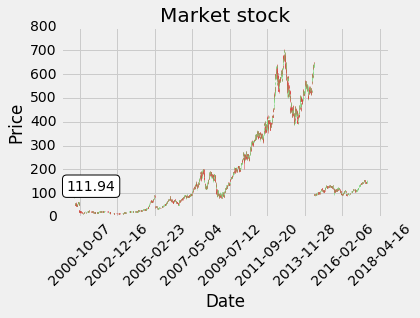

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt
%matplotlib inline
style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    


#converting the datestamps from the Yahoo finance API to times that Matplotlib understands
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)

    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)

    return bytesconverter


def graph_data():
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[2:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    # pprint.pprint(stock_data)
    date, openp, highp, lowp, closep, adj_closep, volume = np.loadtxt(stock_data,
                                                                      delimiter=',',
                                                                      unpack=True,
                                                                      # %Y = full year. 2015
                                                                      # %y = partial year 15
                                                                      # %m = number month
                                                                      # %d = number day
                                                                      # %H = hours
                                                                      # %M = minutes
                                                                      # %S = seconds
                                                                      # 12-06-2014
                                                                      # %m-%d-%Y
                                                                      converters={0: bytespdate2num('%Y-%m-%d')})

    
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    #annotation for last stock price,but here it is first price
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+3, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax1.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax1.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Market stock')
    #plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.87, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data()